In [1]:
import pandas as pd
from ast import literal_eval

train = pd.read_csv('train2.csv', converters = {'token' : literal_eval})
train

,token,label
0,"[김, 다나, 디자인, 기자, 남, 이야기, 를, 듣, 지, 않, 고, 라, 떼, ...",0
1,"[환, 위험, 모니터링, AI, 솔루션, 등, 포함, 9, 일, 서울, 강남구, 트...",0
2,"[국제선, 여객, 수요, 늘어나, 었, 지만, 코로나, 이전, 수준, 회복, 까지,...",0
3,"[한솔, 제지, 내수, 시장, 점유율, 37, 8, 에서, 45, 5, 까, 지, ...",0
4,"[소비재, 지수, 이달, 7, 하락, 실적, 대비, 주가, 하락폭, 커, 어, 최근...",1
...,...,...
89290,"[최, 태원, 대한, 상공, 회의, 소, 회장, 이, 24, 일, 오전, 상의, 국...",0
89291,"[미래, 에, 셋, 증권, 은, 인공지능, 기반, 핀, 테크, 스타트, 업, 크래프...",1
89292,"[이강, 민, 데이, 원, 컴퍼니, 대표, 최신, 화, 콘텐츠, 중점, 수업, 15...",1
89293,"[청약, 통장, 없이, 만, 19, 세, 이상, 누구, 나, 청약, 신청, 가능, ...",1


In [2]:
from tqdm import tqdm
def stopword(x):
  stopword = [r'상승.*', r'하락.*', r'급등.*', r'급락.*',
              '상승세', '하락세', '폭등', '폭락', '오름세',
              '약세', '강세', '의', '가', '이', '은', '들',
              '는', '좀', '잘', '걍', '과', '도', '를', '으로',
              '자', '에', '와', '한', '하다', '에', '은', '는', '하']
  return [i for i in x if i not in stopword and not i.isdigit()]

tqdm.pandas()
train["token"] = train.token.progress_apply(stopword)
train

100%|██████████| 89295/89295 [00:25<00:00, 3564.39it/s]


,token,label
0,"[김, 다나, 디자인, 기자, 남, 이야기, 듣, 지, 않, 고, 라, 떼, 만, ...",0
1,"[환, 위험, 모니터링, AI, 솔루션, 등, 포함, 일, 서울, 강남구, 트레이드...",0
2,"[국제선, 여객, 수요, 늘어나, 었, 지만, 코로나, 이전, 수준, 회복, 까지,...",0
3,"[한솔, 제지, 내수, 시장, 점유율, 에서, 까, 지, 분기, 해상, 운임, 료,...",0
4,"[소비재, 지수, 이달, 하락, 실적, 대비, 주가, 하락폭, 커, 어, 최근, 중...",1
...,...,...
89290,"[최, 태원, 대한, 상공, 회의, 소, 회장, 일, 오전, 상의, 국제, 회의장,...",0
89291,"[미래, 셋, 증권, 인공지능, 기반, 핀, 테크, 스타트, 업, 크래프트, 테크놀...",1
89292,"[이강, 민, 데이, 원, 컴퍼니, 대표, 최신, 화, 콘텐츠, 중점, 수업, 명,...",1
89293,"[청약, 통장, 없이, 만, 세, 이상, 누구, 나, 청약, 신청, 가능, 내, 집...",1


In [4]:
validation = pd.read_csv('validation2.csv', converters = {'token' : literal_eval})
validation

,token,label
0,"[2500, 억, 모집, 액, 못, 채우, 고, 미달, 3, 년, 물, 2200, ...",1
1,"[투자, 의견, 매수, 목표, 주가, 7, 만, 5000, 원, 유지, 메리츠증권,...",0
2,"[금감원, 손보사, 에, 유사, 암, 일반, 암, 진단, 비, 자료, 요구, 올해,...",0
3,"[2, 분기, 주요, 손해, 보험사, 실적, 전년, 대비, 5, 10, 증가, 전망...",0
4,"[지정, 감사인, 제도, 로, 교체, 늘, 어, 외부, 감사, 전문, 성, 결여, ...",0
...,...,...
89290,"[적자, 지속, 기업, 가치, 시장, 기대치, 못, 미치, 어, 네이버, 보유, 지...",1
89291,"[앱, 출석, 후, 회원, 가, 입시, 80, 만, 명, 한정, 선착순, 국내, 최...",1
89292,"[31, 일, 증권, 신고서, 제출, 4, 월, 기관, 수요, 예측, SK, 스퀘어...",1
89293,"[삼부, 토건, 제, 3, 자, 배정, 증자, 방식, 으로, SK, 에코, 플랜트,...",1


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [8]:
x_train = []

for i in range(0, int(len(train) * 0.8)):
    x_train.append(train['token'][i])

In [11]:
x_test = []

for i in range(int(len(train) * 0.8), len(train)):
    x_test.append(train['token'][i])

In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

In [14]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 61122
등장 빈도가 2번 이하인 희귀 단어의 수: 16681
단어 집합에서 희귀 단어의 비율: 27.29131900134158
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.066107195777679


In [15]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 44442


In [16]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [18]:
print(x_train[0])

[147, 7701, 836, 547, 796, 2625, 336, 20, 92, 6, 109, 2983, 17, 753, 2625, 25, 14914, 11, 25181, 30, 8, 357, 379, 1740, 48, 60, 132, 165, 2835, 2194, 1211, 506, 2454, 2714, 3, 25843, 4, 1, 48, 60, 3, 989, 8667, 97, 11, 9167, 3139, 112, 1259, 6499, 1308, 1753, 1774, 2919, 338, 215, 3239, 3, 2294, 46, 1, 84, 1359, 506, 11, 736, 51, 6362, 1541, 6499, 13562, 725, 2, 169, 104, 6, 9, 116, 177, 15, 18, 84, 33, 28, 379, 132, 103, 14914, 12, 2825, 5, 89, 25, 338, 713, 3, 1449, 165, 2835, 2194, 3, 215, 4230, 11, 2294, 4, 1, 6604, 914, 3, 260, 5, 906, 2582, 1161, 6, 1456, 578, 153, 3837, 13, 1196, 11677, 449, 25, 928, 1139, 162, 217, 1468, 1, 379, 132, 52, 717, 1110, 25, 8115, 8291, 5, 9, 2357, 25, 1927, 1224, 47, 5, 2011, 204, 1713, 3, 1449, 4, 1, 1211, 506, 459, 3, 1182, 1753, 1308, 2897, 978, 13, 1774, 850, 2950, 15, 3925, 64, 263, 2, 379, 132, 68, 2, 26, 48, 734, 1124, 32, 10674, 17, 89, 1116, 499, 10524, 152, 1308, 3, 180, 1, 23, 394, 1430, 412, 11, 8151, 5, 1363, 1058, 6, 4, 1, 68, 2, 26, 2

In [19]:
y_train = np.array(train['label'])
y_test = np.array(train['label'])

In [20]:
drop_train = [index for index, sentence in enumerate(x_train) if len(sentence) < 1]

In [59]:
x_train = np.delete(x_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)[0:71436]
print(len(x_train))
print(len(y_train))

71436
71436


In [23]:
print(max(len(sentence) for sentence in x_train))
print(sum(map(len, x_train)) / len(x_train))

4572
490.14321910521306


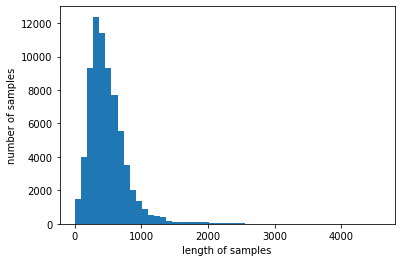

In [25]:
plt.hist([len(sentence) for sentence in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [28]:
def below_threshold_len(max_len, nested_list):
    count = 0
    for sentence in nested_list:
        if(len(sentence) <= max_len):
            count = count + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [36]:
max_len = 2000
below_threshold_len(max_len, x_train)

전체 샘플 중 길이가 2000 이하인 샘플의 비율: 99.52544935326726


In [37]:
x_train = pad_sequences(x_train, maxlen = max_len)
x_test = pad_sequences(x_test, maxlen = max_len)

In [50]:
from tensorflow.keras.layers import Embedding, Dense
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [53]:
embedding_dim = max_len # 임베딩 벡터의 차원
dropout_ratio = 0.4 # 드롭아웃 비율
num_filters = 3 # 커널의 수
kernel_size = 3 # 커널의 크기
hidden_units = 128 # 뉴런의 수

In [54]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding = 'valid', activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_units, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(1, activation = 'sigmoid'))

In [56]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)
mc = ModelCheckpoint('TextCNN_best_model.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)

In [60]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['acc'])
history = model.fit(x_train, y_train, epochs=20, validation_data = (x_test, y_test), callbacks=[es, mc])

Epoch 1/20


: 

: 